In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import requests

In [3]:
url = "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
filename = "insurance.csv"

# Using requests to fetch the content
response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {filename} successfully.")
else:
    print(f"Failed to download {filename}. Status code: {response.status_code}")

# Read the dataset into a pandas DataFrame
dataset = pd.read_csv(filename)

# Display the last few rows of the DataFrame
dataset.tail()

Downloaded insurance.csv successfully.


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
X = dataset.drop('expenses', axis=1)  # Features
y = dataset['expenses']               # Target

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

model.fit(X_train_tensor, y_train_tensor, epochs=100, verbose=1)

test_dataset = X_test_tensor
test_labels = y_test_tensor

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 303127072.0000 - mean_absolute_error: 13045.2266 - mean_squared_error: 303127072.0000 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 328777088.0000 - mean_absolute_error: 13307.3828 - mean_squared_error: 328777088.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 320598304.0000 - mean_absolute_error: 13191.0605 - mean_squared_error: 320598304.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 290711264.0000 - mean_absolute_error: 11925.7725 - mean_squared_error: 290711264.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 156425776.0000 - mean_absolute_error: 8095.3296 - mean_squared_error: 156425776.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 68558000.0000 - mean_absolute_error: 5201.1772 - mean_squared_error: 68558000.0000 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 44595888.0000 - mean_absolute_error: 5144.8154 - mean_squar

9/9 - 0s - 9ms/step - loss: 20539132.0000 - mean_absolute_error: 2645.6421 - mean_squared_error: 20539132.0000
Testing set Mean Abs Error: 2645.64 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


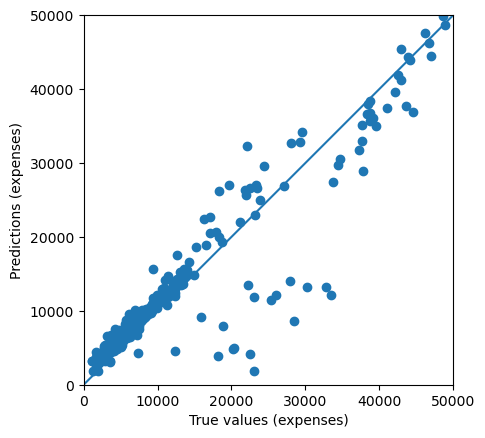

In [5]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)